# Análisis exploratorio de datos (EDA)

### Librerías

In [20]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Estadística 
import scipy

import warnings

### Carga de datos

In [4]:
df = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\ML_student_depression\data\raw\Student Depression Dataset.csv')
df.head()
# CGPA: Promedio de calificaciones u otros puntajes académicos.

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [9]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [16]:
print(df.shape)
print('-----------------------------------------------------------------------------------')
print(df.columns)
print('-----------------------------------------------------------------------------------')
print(df.info())
print('-----------------------------------------------------------------------------------')

(27901, 18)
-----------------------------------------------------------------------------------
Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3 

In [8]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [17]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [14]:
# Comprobamos que no tenga valores duplicados
df[df.duplicated(keep = False)] 

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [18]:
summary_df = pd.DataFrame(columns=[
    'Nombre de la variable', 
    'Tipo de dato', 
    'Tipo de variable', 
    'Cardinalidad', 
    'Distribución', 
    'Valores faltantes (cantidad)', 
    'Valores faltantes (%)', 
    'Outliers (cantidad)', 
    'Outliers (%)', 
    'Rango de valores', 
    'Moda', 
    'Media', 
    'Mediana', 
    'Asimetría', 
    'Curtosis', 
    'Resultados de pruebas de normalidad'
])

def summarize_variable(col):
    data_type = col.dtype
    variable_type = 'numérica' if np.issubdtype(data_type, np.number) else 'categórica'
    cardinality = col.nunique()
    normality_test_result = 'N/A'

    if np.issubdtype(data_type, np.number):
        # Test de K-S
        d_statistic, p_value = stats.kstest(col.dropna(), 'norm', args=(col.mean(), col.std()))
        normality_test_result = 'Normal' if p_value > 0.05 else 'No normal'
        distribution = 'Gaussiana' if normality_test_result == 'Normal' else 'No gaussiana'
    else:
        distribution = 'Categórica'
    
    # Valores faltantes
    missing_count = col.isnull().sum()
    missing_percentage = missing_count / len(col) * 100
    
    # Outliers
    if np.issubdtype(data_type, np.number):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = col[(col < lower_bound) | (col > upper_bound)]
        outliers_count = outliers.count()
        outliers_percentage = outliers_count / len(col) * 100
    else:
        outliers_count = 0
        outliers_percentage = 0

    value_range = f"{col.min()} - {col.max()}" if np.issubdtype(data_type, np.number) else 'N/A'
    
    mode = col.mode()[0] if variable_type == 'categórica' else col.mode().values[0]
    mean = col.mean() if variable_type == 'numérica' else 'N/A'
    median = col.median() if variable_type == 'numérica' else 'N/A'
    skewness = col.skew() if variable_type == 'numérica' else 'N/A'
    kurtosis = col.kurtosis() if variable_type == 'numérica' else 'N/A'

    summary_df.loc[len(summary_df)] = [
        col.name, 
        data_type, 
        variable_type, 
        cardinality, 
        distribution, 
        missing_count, 
        missing_percentage, 
        outliers_count, 
        outliers_percentage, 
        value_range, 
        mode, 
        mean, 
        median, 
        skewness, 
        kurtosis, 
        normality_test_result
    ]

# Resumir cada variable en el DataFrame
for column in df.columns:
    summarize_variable(df[column])

# Configurar el DataFrame para mejor visualización
summary_df.set_index('Nombre de la variable', inplace=True)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar el truncado de filas

# Mostrar el resumen en formato DataFrame
import IPython.display as display
display.display(summary_df)

,Tipo de dato,Tipo de variable,Cardinalidad,Distribución,Valores faltantes (cantidad),Valores faltantes (%),Outliers (cantidad),Outliers (%),Rango de valores,Moda,Media,Mediana,Asimetría,Curtosis,Resultados de pruebas de normalidad
Nombre de la variable,,,,,,,,,,,,,,,
id,int64,numérica,27901,No gaussiana,0,0.000000,0,0.000000,2 - 140699,2,70442.149421,70684.0,-0.00538,-1.207073,No normal
Gender,object,categórica,2,Categórica,0,0.000000,0,0.000000,N/A,Male,N/A,N/A,N/A,N/A,N/A
Age,float64,numérica,34,No gaussiana,0,0.000000,12,0.043009,18.0 - 59.0,24.0,25.8223,25.0,0.132239,-0.846206,No normal
City,object,categórica,52,Categórica,0,0.000000,0,0.000000,N/A,Kalyan,N/A,N/A,N/A,N/A,N/A
Profession,object,categórica,14,Categórica,0,0.000000,0,0.000000,N/A,Student,N/A,N/A,N/A,N/A,N/A
Academic Pressure,float64,numérica,6,No gaussiana,0,0.000000,0,0.000000,0.0 - 5.0,3.0,3.141214,3.0,-0.135165,-1.16117,No normal
Work Pressure,float64,numérica,3,No gaussiana,0,0.000000,3,0.010752,0.0 - 5.0,0.0,0.00043,0.0,108.594361,12110.636193,No normal
CGPA,float64,numérica,332,No gaussiana,0,0.000000,9,0.032257,0.0 - 10.0,8.04,7.656104,7.77,-0.113063,-1.023144,No normal
Study Satisfaction,float64,numérica,6,No gaussiana,0,0.000000,0,0.000000,0.0 - 5.0,4.0,2.943837,3.0,0.010423,-1.223155,No normal


## Observaciones
- El conjunto de datos se compone de 18 columnas (variables) y 27901 filas
- Utiliza un espacio de memoria de 3.5+ MB
- Solo hay valores nulos en 'Financial Stress'
- No hay valores duplicados
- No hay datos faltantes
- Hay algunos tipos de dato que probablemente tenga que cambiar
- No hay jerarquías o estructuras anidadas

## Visualizaciones:

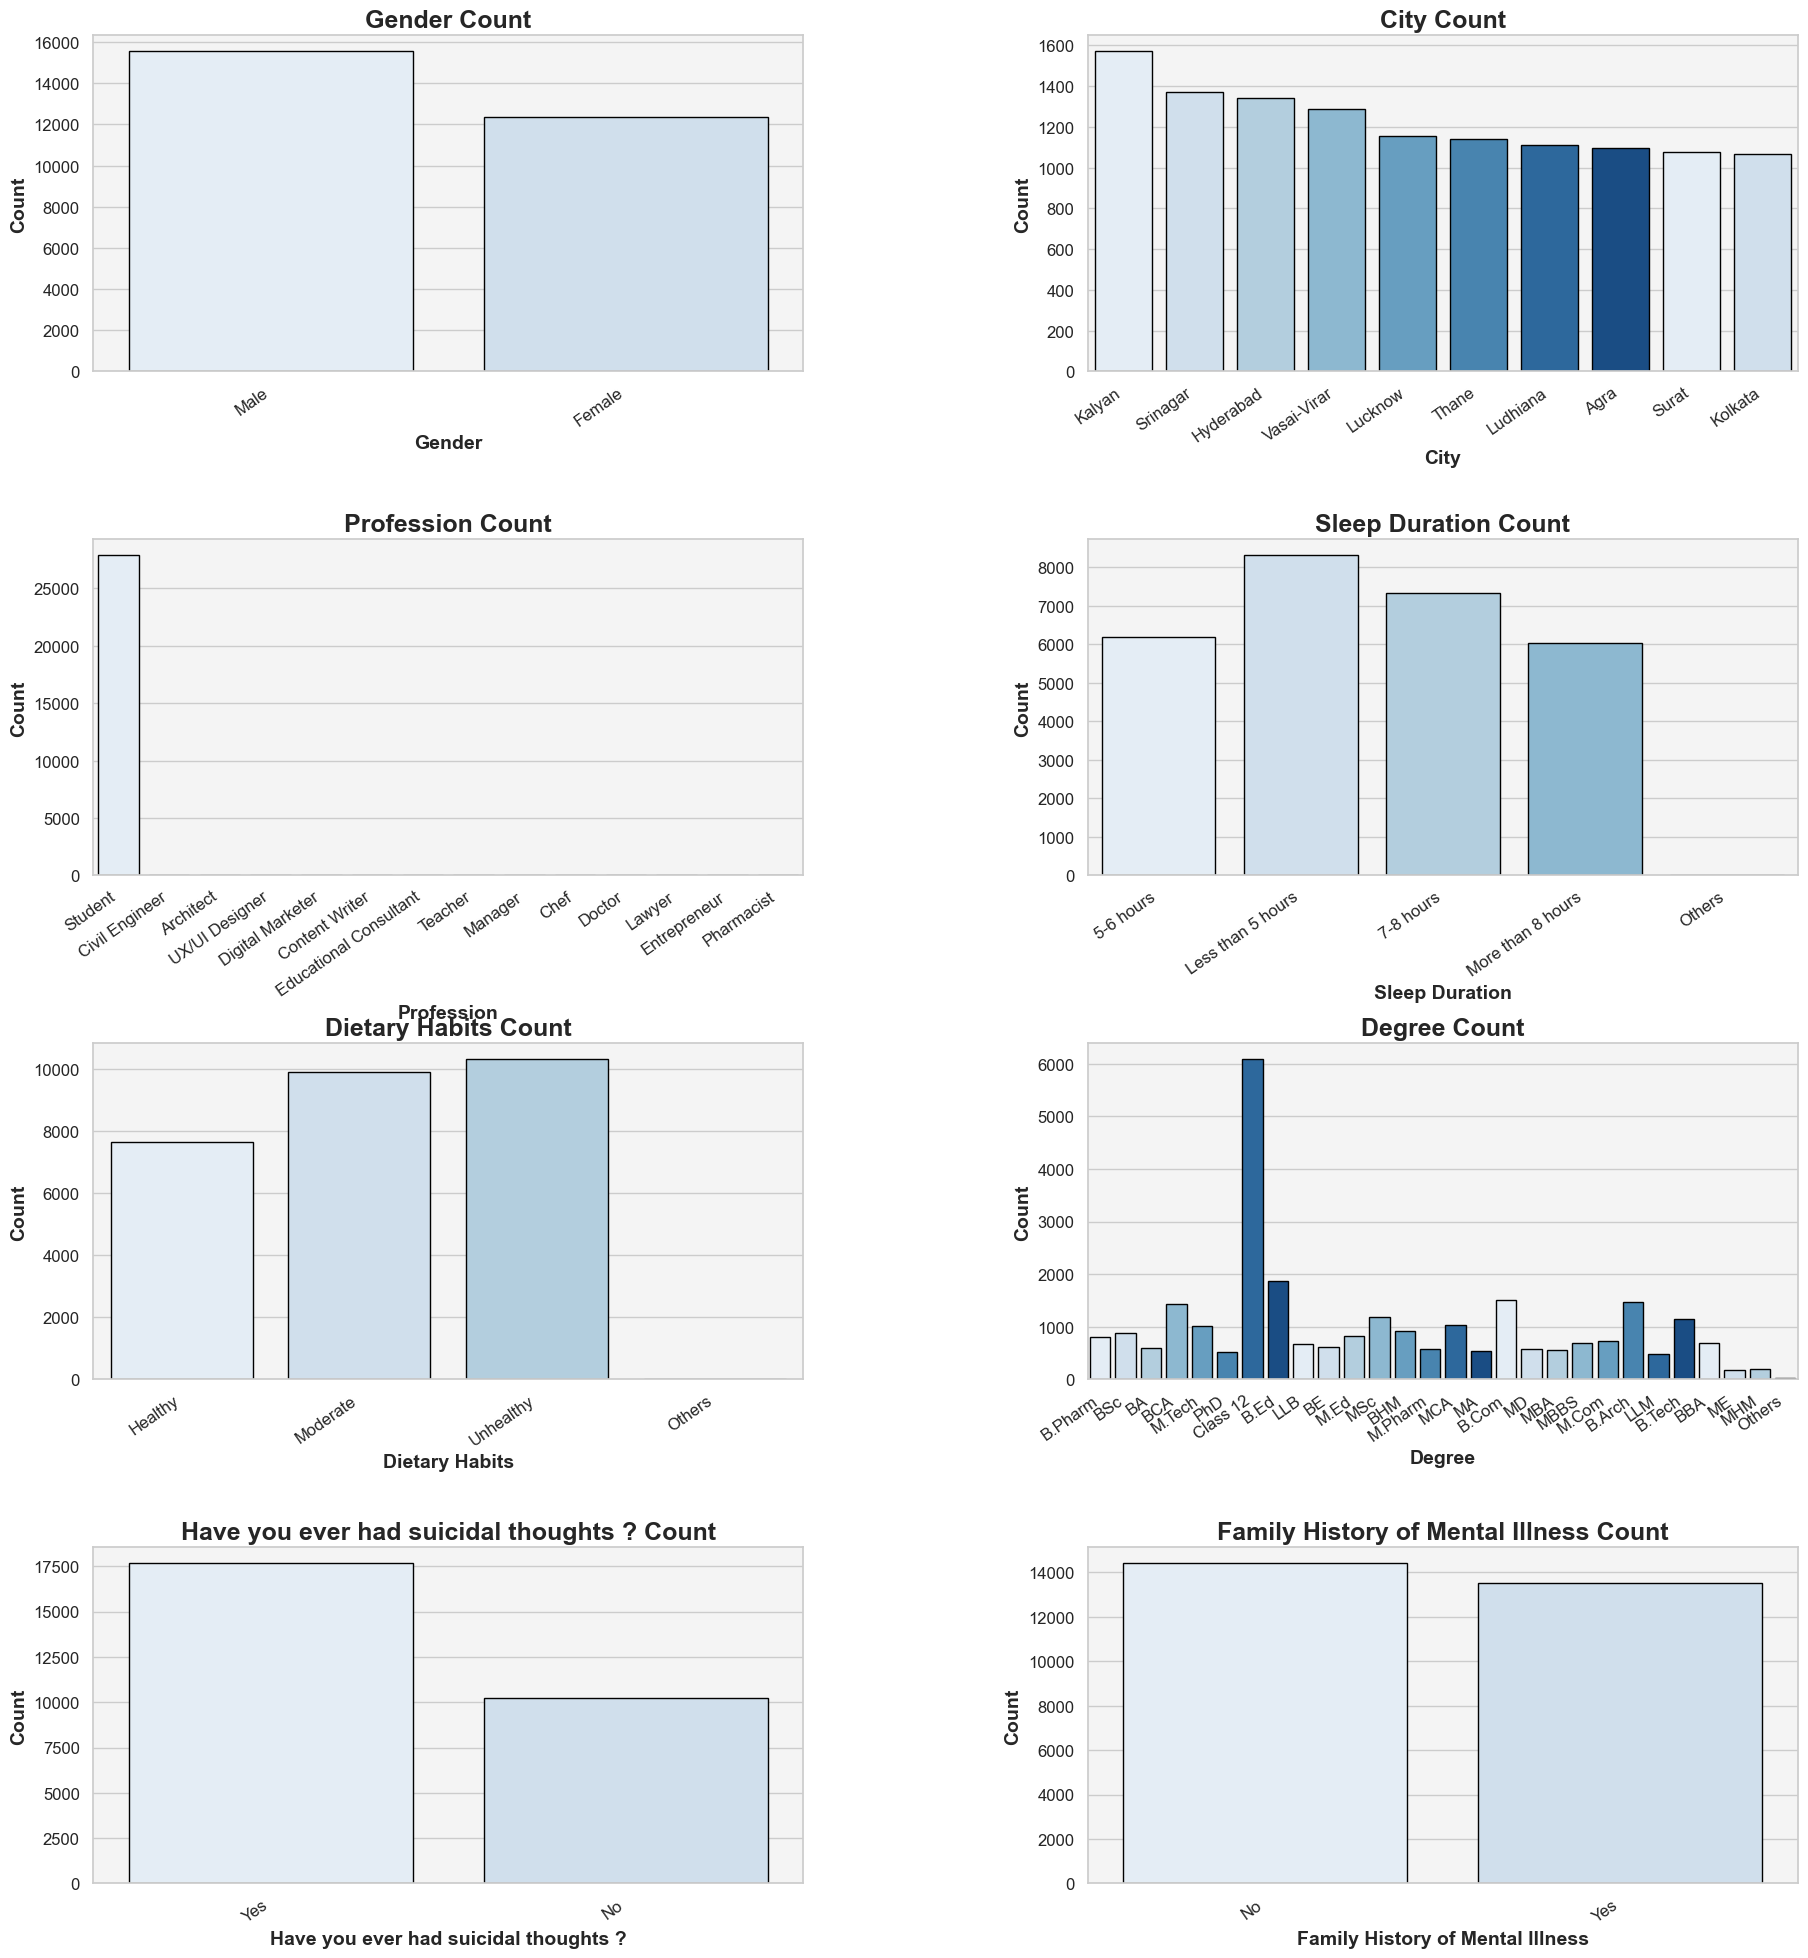

In [ ]:
# Histogramas
warnings.filterwarnings("ignore")

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

sns.set(style="whitegrid")

num_cols = 2  # Two plots per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing
colors = sns.color_palette("Blues", n_colors=8)

for i, col in enumerate(categorical_columns):
    # Increase the size of the "City" plot for better readability
    if col.lower() == 'city':
        sns.countplot(data=df, x=col, ax=axes[i], palette=colors, order=df[col].value_counts().iloc[:10].index)  # Top 10 cities only
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    else:
        sns.countplot(data=df, x=col, ax=axes[i], palette=colors)
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
        # Set labels
    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    # Rotate x-axis labels for readability
    axes[i].tick_params(axis='x', rotation=35, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    # Align x-axis labels horizontally to avoid overlap
    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')

    # Set bar edge color
    for bar in axes[i].patches:
        bar.set_edgecolor('black')

    # Set a soft gray background for subplot
    axes[i].set_facecolor('#f4f4f4')
    # Remove unused axes if any
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

Se han detectadado outliers en estas columnas:
Age
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Work/Study Hours
Financial Stress
Depression


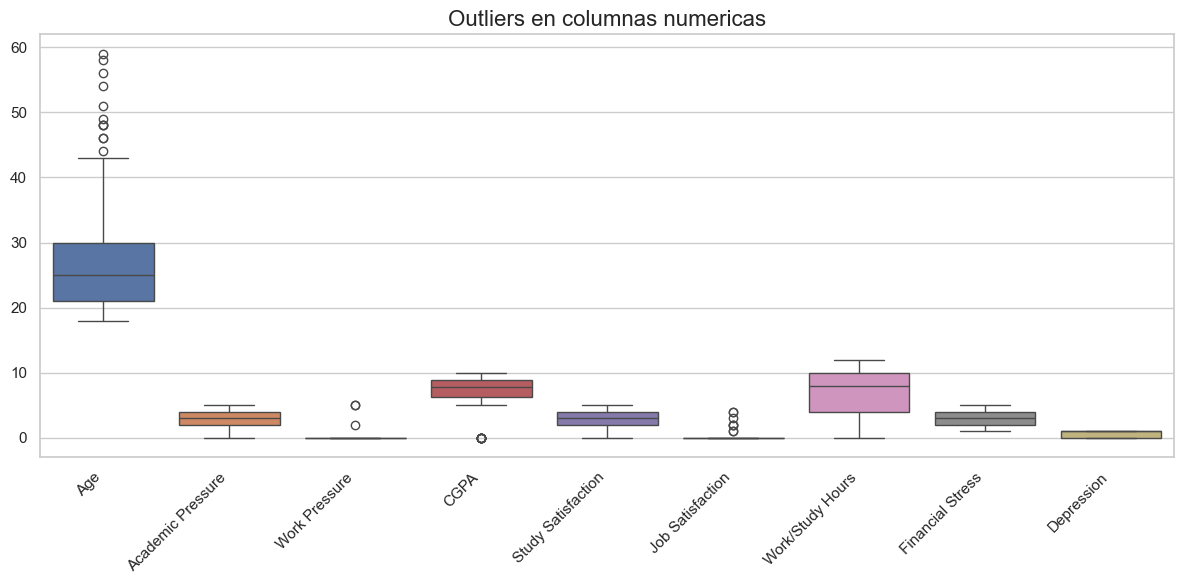

In [23]:
# Outliers
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']  # Exclude 'id'

def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
# Get outliers based on IQR method
numerical_outliers = detect_outliers_iqr(df, numerical_columns)

print(f"Se han detectadado outliers en estas columnas:")
for col, outlier_data in numerical_outliers.items():
    print(col)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])  
plt.title('Outliers en columnas numericas', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In [26]:
# 1. Matriz de correlación
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

KeyError: 2

<Figure size 1000x600 with 0 Axes>

In [25]:
# 3. Heat map de la matriz de correlación (repetido como un enfoque adicional)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heat Map de la Matriz de Correlación')
plt.show()

NameError: name 'corr' is not defined

<Figure size 1000x800 with 0 Axes>